In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Example 0 - `seaborn`

Code taken from [Seaborn Ridge Plot Example](https://seaborn.pydata.org/examples/kde_ridgeplot.html).

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\s

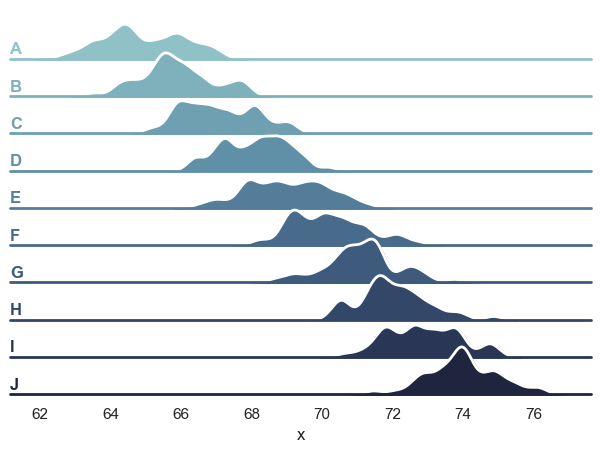

In [61]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5) 
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5) # white outline

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes) # transAxes: 0,0 is bottom left, 1,1 is top right


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

### Example 1 - Reproduction

In [62]:
df = pd.read_csv('../../../data/fuel-econ.csv')

THRESHOLD = 80

make_freqs = df['make'].value_counts()
most_makes = make_freqs[make_freqs >= THRESHOLD]

df_sub = df.loc[df['make'].isin(most_makes.index)]

In [63]:
comb_means = df_sub.groupby('make')['comb'].mean()
comb_means_order = comb_means.sort_values().index

In [64]:
pal = sns.cubehelix_palette(n_colors=comb_means.size, rot=-.25, light=.7)
pal

[[0.5632111255041908, 0.758620966612444, 0.7764634182455045],
 [0.5228240791906859, 0.7234585216245827, 0.7543528888888889],
 [0.4889835287844232, 0.6912103573960824, 0.7344077766657325],
 [0.4570212641324548, 0.6581053988009254, 0.7139356154941481],
 [0.42685905596923857, 0.624226740787779, 0.6927040647230813],
 [0.39495564489881346, 0.5853018492856988, 0.6676368083309986],
 [0.3682703546413804, 0.5500895089842062, 0.6440761611816908],
 [0.3430181881250315, 0.5144098547555366, 0.619113502467283],
 [0.3161310561612068, 0.4738491895874811, 0.5891392001412459],
 [0.29339603810812687, 0.43754839628113973, 0.5606431591163841],
 [0.27156515057006514, 0.4011390634159816, 0.5302634721583539],
 [0.2504408550123121, 0.364742855518275, 0.4978863138743028],
 [0.22726013413347154, 0.3239665768415395, 0.4589600741394332],
 [0.20693154855751142, 0.2880092577470325, 0.4220587392553281],
 [0.18662597009668289, 0.25245266023639595, 0.38294532023107464],
 [0.1635175490164578, 0.21308372438018483, 0.33627337988703215],
 [0.14247639572098364, 0.17878496344028308, 0.29241946146393155],
 [0.12071162840208301, 0.14526386650440642, 0.2463679091477368]]

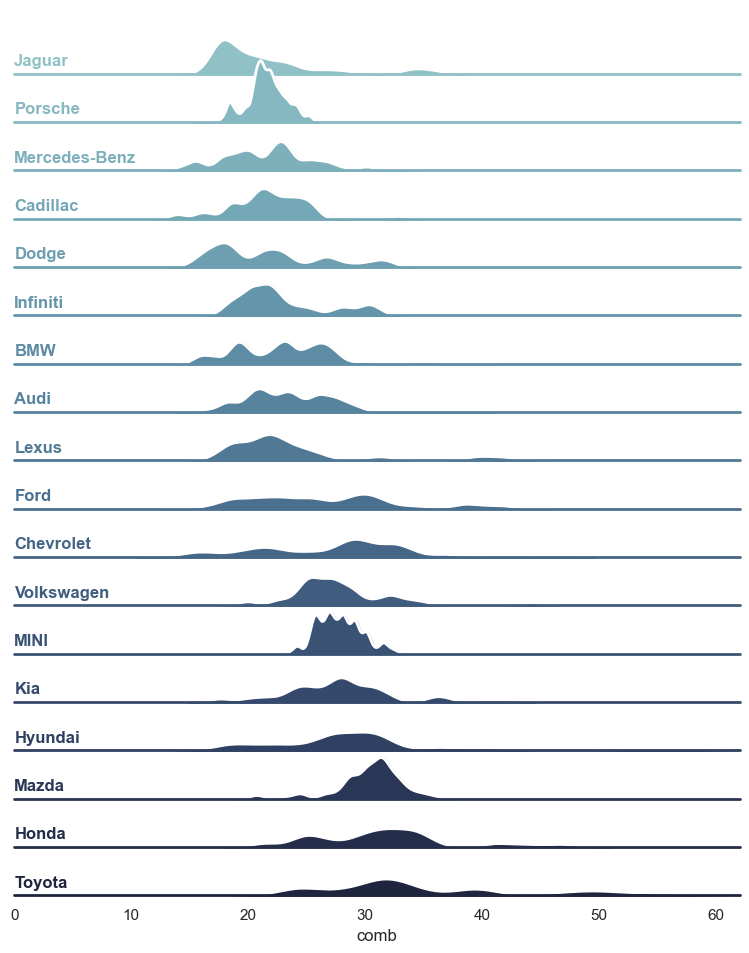

In [77]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df_sub, row="make", hue='make', aspect=15, height=.55, row_order=comb_means_order, hue_order=comb_means_order, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "comb", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5) # plot the density and fill it
g.map(sns.kdeplot, "comb", clip_on=False, color="w", lw=2, bw_adjust=.5) # white outline

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

g.map(label, "comb")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Set the x axis range
g.set(xlim=(0, 62)) # causes slight extension of line beyond the plot

# Remove the y-axes
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True);